### Programa de Estudios Superiores 2019-2020
### Programación I - proyecto final
#### Elaborado por <span class="alert alert-info"> ***Mariela Benavides*** </span><br>
***
***Instrucciones generales:*** resuelve el siguiente problema de acuerdo a la especificación dada. 
- El código debe ir comentado para explicar la lógica y debe ser totalmente funcional para ser considerado correcto. De lo contrario, la calificación podrá ser subjetiva.
- Al final de la definición de la clase, obtenga una instancia y muestra que el objeto se comporta de acuerdo a las especificaciones deseadas, para poder calificarte más rápidamente.
***

# Estimador de desviación estándar *leave-one-out (LOO)* 

Considere un conjunto de datos $(x_{1i}, \ldots, x_{6i})$ y $y_i$, donde $i = 1, \ldots, n$. A partir de este conjunto, es posible estimar el modelo de regresión lineal:

$$ y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \beta_3 x_{3i}+ \beta_4 x_{4i}+ \beta_5 x_{5i}+ \beta_6 x_{6i}$$ 

el cual puede expresarse en forma matricial como $y = X\beta$, donde $\beta$ corresponde al vector de parámetros del modelo.

En cierta ocasión, un profesor de econometría se encontraba estudiando nuevas formas de obtener estimadores para la varianza de los parámetros muestrales. Después de mucho pensar, este ingenioso profesor resulta con un método de estimación denominado *leave-one-out estimator* (estimador de "deja uno afuera") que consiste en un proceso iterativo con el conjunto de datos: 

1. Para cada $i$ en el conjunto de datos:  

    - Se elimina temporalmente la observación $i$ del conjunto para obtener el conjunto "modificado" $X_{-i}$.
    
    - Se estima el modelo de regresión lineal resultante $y^* = X_{-i}\beta$
    
    - Se guarda el resultado del parámetro $\beta^{(i)}$ de interés, donde $i$ denota que $\beta$ se estimó sin la observación $i$. 
    
2. Al final del proceso iterativo, se estima la desviación estándar del conjunto $\lbrace\beta^{(1)}, ..., \beta^{(n)}\rbrace$ para obtener el estimador LOO del parámetro.

A continuación, se muestra una imagen representativa del proceso iterativo sobre el conjunto de datos. En cada iteración, se estima con las muestras en blanco y se elimina temporalmente la observación en gris.

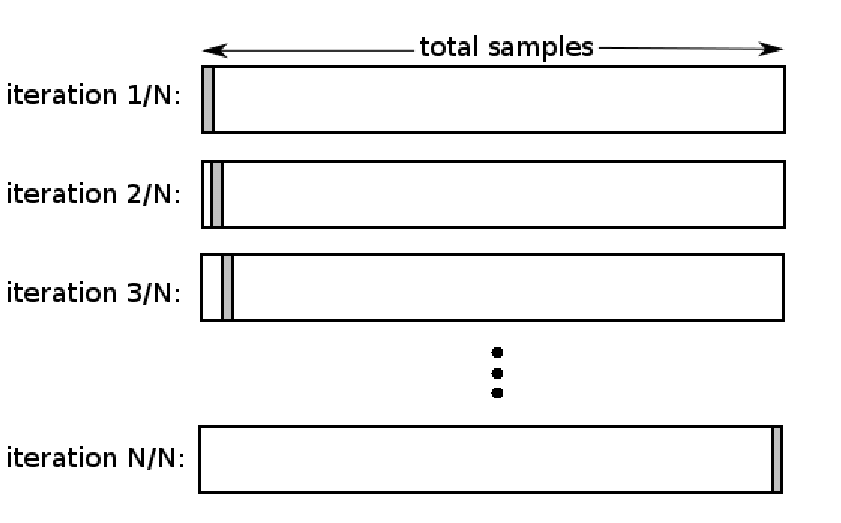 

Después de ocurrírsele este método al profesor, se dió cuenta que no sabía cómo llevar a cabo este proceso iterativo, ya que su habitual programa (software) de trabajo no permitía este tipo de procedimientos. Sin embargo, el profesor se recordó de su brillante amigo, que ha llevado recientemente un curso de programación en Python, y decide pedirle ayuda con esta tarea. Cuando el profesor contacta a su amigo, éste le dice que está muy cansado debido al curso que recién ha tomado, sin embargo, el profesor insiste en pedir su ayuda. 

Finalmente, después de recordar viejos tiempos y la invitación a un par de cervezas, el profesor logra convencer a su amigo de que lo ayude. Para esto, su amigo piensa resolver este problema a través de la implementación de una clase de Python. 

## Descripción de la clase

El amigo del profesor va a implementar la solución a través de la clase `looEstimation` de la siguiente forma:

- Al crear un objeto de esta clase, el constructor debe recibir el conjunto de datos `data`, cuya primera columna será de unos, luego estarán las variables $x$ y finalmente, la última columna corresponde a la variable $y$.

Además, deberá implementar los siguientes métodos:

- Método `estimate`, que lleve a cabo el proceso de estimación sobre una matriz $X$ y vector $y$ para estimar todos los parámetros del modelo, los cuales devolverá como un arreglo de numpy.

- Método `looSD`, que utilizará el método anterior sobre los datos guardados en el constructor y llevará a cabo el proceso iterativo $\lbrace\beta^{(1)}, ..., \beta^{(n)}\rbrace$. Finalmente, devolverá la desviación estándar del conjunto de parámetros.
    - Se deben guardar los parámetros de cada iteración en alguna estructura (pandas o ndarray) para ser consumidos por los siguientes métodos.
    
- Método `plotDistribution`, que realizará una gráfica del histograma para cada uno de los diferentes parámetros del modelo.
    - Deberá agregar una opción booleana savePlots para escoger si guardar las gráficas en un formato de alta calidad (pdf, png).
    
- Método `getParameters`, que devolverá un `DataFrame` con los parámetros estimados en cada iteración del proceso.
    - Permite el parámetro booleano `saveCSV` para determinar si se debe guardar este `DataFrame` en un archivo CSV.

<div class="alert alert-info">
<b>Importe los paquetes que sean necesarios</b>: <br>


</div>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

<div class="alert alert-info">
<b>Escriba su código en la celda siguiente</b>: <br>


</div>

In [2]:
class looEstimation(object):
 
    def __init__(self, data):
        
        '''    
         Recibe el conjunto de datos `data`, cuya primera columna será 
        de unos, luego estarán las variables $x$ y finalmente, la última
        columna corresponde a la variable $y$.
        '''
        #el constructor recibe el nombre del archivo sobre el cual se quiere hacer la estimación
        datos=data+".npy"
        self.data=np.load(datos) #genera el atributo data
        self.itera=self.data.shape[0]
        self.X=self.data[ : , :7 ] #genera su matriz X de datos correspondientes a las variables exógenas
        self.Y=self.data[ : , 7: ] #genera su matriz Y de datos para la variable endógena
        
        
    def estimate(self):
        
        '''
        lleve a cabo el proceso de estimación sobre una matriz $X$ y 
        vector $y$ para estimar todos los parámetros del modelo, los 
        cuales devolverá como un arreglo de numpy
        '''
        A=((self.X).T)@(self.X) #Obtiene el producto Transpuesta(X)X
        B=((self.X).T)@(self.Y) #Obtiene el produtcto Transpuesta(X)Y
        betas=((np.linalg.inv(A))@B).reshape(1,7) #Obtiene la estimación para los parametros betas 
        return betas
        
            
    def looSD(self):
        
        XX=self.X.copy()
        YY=self.Y.copy()
        
        a=np.zeros([1,7])
        i=0
        while i<(Datos.itera):
            self.X=np.vstack((XX[ :i-1 , : ],XX[ i: , : ]))
            self.Y=np.vstack((YY[ :i-1 , : ],YY[ i: , : ]))
            
            betas_i=self.estimate()
            
            b= np.asarray(betas_i)
            guardado=np.vstack((a,b)) #acumula los resultados en un array
            i=i+1
            a=guardado#modifica el array inicial sobre el cual se guardaran los betas calculados por cada iteración

        '''
        Utiliza el método estimate sobre los datos guardados en el constructor 
        y llevará a cabo el proceso iterativo. Se deben guardar los parámetros 
        de cada iteración en alguna estructura (pandas o ndarray) para 
        ser consumidos por los siguientes métodos.
        '''        
        intercepto=a[ 1: ,0]#extrae del array la columna de b0
        X1=a[ 1: ,1]#extrae del array la columna de b1
        X2=a[ 1: ,2]#extrae del array la columna de b2
        X3= a[ 1: ,3]#extrae del array la columna de b3
        X4= a[ 1: ,4]#extrae del array la columna de b4
        X5= a[ 1: ,5]#extrae del array la columna de b5
        X6= a[ 1: ,6]#extrae del array la columna de b6

        df = pd.DataFrame({'b0': intercepto , 'b1': X1, 'b2':X2,'b3':X3 , 'b4':X4 , 'b5':X5  ,'b6':X6 })
        #Agrupa la información de las iteraciones en un Data Frame
        return df
    
    
    def plotDistribution(self, savePlots=False):
        
        '''
        Realiza una gráfica del histograma para cada uno de los diferentes
        parámetros del modelo. La opción booleana savePlots sirve para escoger 
        si guardar las gráficas en un formato de alta calidad (pdf, png).
        '''
        df=self.looSD()#llama a la ejecución del método iterativo
        #utilizando el resultado de aplicar el método se realizan los histogramas para cada uno de los betas
        print("Histogramas :")
        df.hist(column='b0',color="skyblue",bins=12)#Genera el histograma de b0 en forma individual
        df.hist(column='b1',color="blue",bins=12)#Genera el histograma de b1 en forma individual
        df.hist(column='b2',color="black",bins=12)#Genera el histograma de b2 en forma individual
        df.hist(column='b3',color="orange",bins=12)#Genera el histograma de b3 en forma individual
        df.hist(column='b4',color="red",bins=12)#Genera el histograma de b4 en forma individual
        df.hist(column='b5',color="darkred",bins=12)#Genera el histograma de b5 en forma individual
        df.hist(column='b6',color="brown",bins=12)#Genera el histograma de b6 en forma individual
        
        
        df['b1'].plot.hist(color="blue",bins=12)#Genera el histograma de b1 para el gráfico agrupado
        df['b2'].plot.hist(color="black",bins=12)#Genera el histograma de b2 para el gráfico agrupado
        df['b3'].plot.hist(color="orange",bins=12)#Genera el histograma de b3 para el gráfico agrupado
        df['b4'].plot.hist(color="red",bins=12)#Genera el histograma de b4 para el gráfico agrupado
        df['b5'].plot.hist(color="darkred",bins=12)#Genera el histograma de b5 para el gráfico agrupado
        df['b6'].plot.hist(color="brown",bins=12) #Genera el histograma de b6 para el gráfico agrupado
    
      
    def getParameters(self,saveCSV):
        
        '''
        Devuelve un `DataFrame` con los parámetros estimados en cada iteración 
        del proceso. Permite el parámetro booleano `saveCSV` para determinar si 
        se debe guardar este `DataFrame` en un archivo CSV.
        '''
        df=self.looSD()#llama a la ejecución del método iterativo
        
        if saveCSV==False:
            pass
        else:
            df.to_csv('Resultados.csv')
            
        a=""
        if saveCSV==False:
            a="No guardar"
        else:
            a="Si guardar"
        
        return print("Su elección fue: %s el DataFrame generado"% a)
        

***
## Área de pruebas personal

Utilice el siguiente espacio para llevar a cabo **sus** pruebas.


In [2]:
data = np.load('data.npy')
data.shape[0]

50

In [ ]:
#nombre_archivo=str(input("Ingrese valores en archivo .csv: "))+".csv"
 #   datos=np.genfromtxt(nombre_archivo,delimiter=',')
  #  X=datos[: , :6]
   # Y=datos[:,6:7]
    #A=(X.T)@X
    #B=((X.T)@Y)
    #betas=((np.linalg.inv(A))@B)
    #return betas

In [53]:
# Se proporciona el archivo de datos para trabajar
# (1's, x1, x2, x3, x4, x5, x6, y)
data = np.load('data.npy')
data.shape

(50, 8)

In [54]:
Datos=looEstimation('data')
b.shape

(1, 7)

In [57]:
       
a=np.zeros([1,7])
i=0
while i<(Datos.itera):
    X_i=np.vstack((Datos.X[ :i-1 , : ],Datos.X[ i: , : ]))
    Y_i=np.vstack((Datos.Y[ :i-1 , : ],Datos.Y[ i: , : ]))

    A_i=((X_i).T)@(X_i) #Obtiene el producto Transpuesta(X)X para la modificación en la iteración
    B_i=((X_i).T)@(Y_i) #Obtiene el produtcto Transpuesta(X)Y para la modificación en la iteración 
    betas_i=(((np.linalg.inv(A_i))@B_i)).reshape(1,7) #Obtiene la estimación para los parametros betas_i

    b= np.asarray(betas_i)
    guardado=np.vstack((a,b)) #acumula los resultados en un array
    i=i+1
    a=guardado#modifica el array inicial sobre el cual se guardaran los betas calculados por cada iteración

'''
Utiliza el método estimate sobre los datos guardados en el constructor 
y llevará a cabo el proceso iterativo. Se deben guardar los parámetros 
de cada iteración en alguna estructura (pandas o ndarray) para 
ser consumidos por los siguientes métodos.
'''        
intercepto=a[ 1: ,0]#extrae del array la columna de b0
X1=a[ 1: ,1]#extrae del array la columna de b1
X2=a[ 1: ,2]#extrae del array la columna de b2
X3= a[ 1: ,3]#extrae del array la columna de b3
X4= a[ 1: ,4]#extrae del array la columna de b4
X5= a[ 1: ,5]#extrae del array la columna de b5
X6= a[ 1: ,6]#extrae del array la columna de b6

df = pd.DataFrame({'b0': intercepto , 'b1': X1, 'b2':X2,'b3':X3 , 'b4':X4 , 'b5':X5  ,'b6':X6 })
#Agrupa la información de las iteraciones en un Data Frame

df

,b0,b1,b2,b3,b4,b5,b6
0,-0.815562,0.286937,0.477428,0.676545,2.077791,1.527715,1.739119
1,-0.702714,0.278315,0.478967,0.675697,2.067953,1.516401,1.739092
2,-0.698253,0.284534,0.474676,0.670301,2.074688,1.528062,1.735125
3,-0.590825,0.288327,0.465322,0.669835,2.072428,1.502920,1.750307
4,-0.647169,0.282280,0.470738,0.672893,2.078596,1.525975,1.725817
5,-0.658312,0.289264,0.475731,0.668121,2.072907,1.530023,1.724441
6,-0.721540,0.279189,0.467120,0.669860,2.078013,1.557540,1.745207
7,-0.706823,0.284792,0.471340,0.671992,2.077216,1.529504,1.732786
8,-0.767779,0.281617,0.480149,0.677258,2.052744,1.528633,1.748310
9,-0.737695,0.281903,0.472836,0.678856,2.086542,1.505758,1.747097


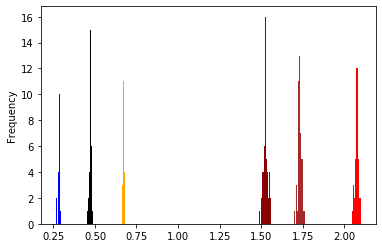

In [59]:
df['b1'].plot.hist(color="blue",bins=12)#Genera el histograma de b1 para el gráfico agrupado
df['b2'].plot.hist(color="black",bins=12)#Genera el histograma de b2 para el gráfico agrupado
df['b3'].plot.hist(color="orange",bins=12)#Genera el histograma de b3 para el gráfico agrupado
df['b4'].plot.hist(color="red",bins=12)#Genera el histograma de b4 para el gráfico agrupado
df['b5'].plot.hist(color="darkred",bins=12)#Genera el histograma de b5 para el gráfico agrupado
df['b6'].plot.hist(color="brown",bins=12) #Genera el histograma de b6 para el gráfico agrupado
    
    

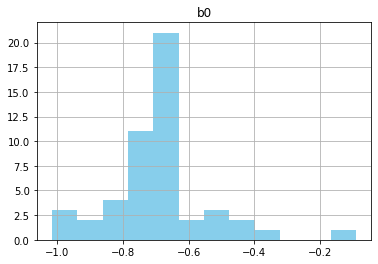

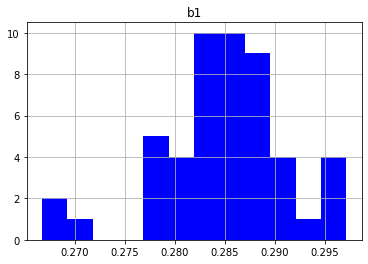

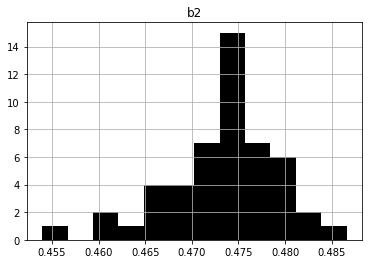

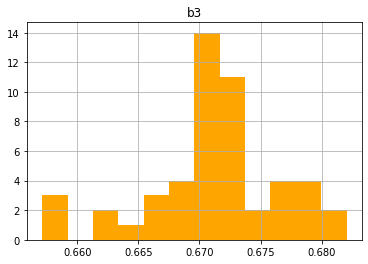

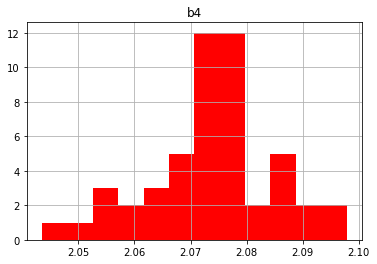

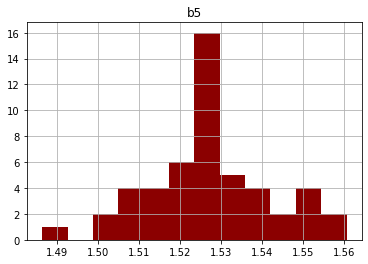

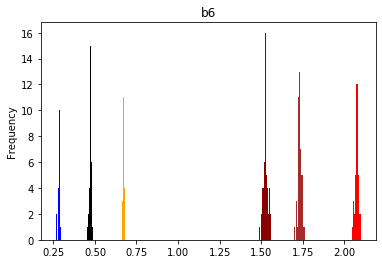

In [44]:

Datos.looSD()
Datos.plotDistribution()
Datos.getParameters(True)

In [63]:
Datos.X

array([[1.00000000e+00, 1.60000000e+01, 1.00000000e+00, 3.00000000e+00,
        5.71817495e+00, 5.74296768e+00, 3.62430396e+00],
       [1.00000000e+00, 5.00000000e+00, 1.90000000e+01, 0.00000000e+00,
        7.21603202e+00, 3.05135780e+00, 9.01730965e+00],
       [1.00000000e+00, 1.10000000e+01, 3.00000000e+00, 5.00000000e+00,
        5.35482202e+00, 5.25215933e-01, 8.02328755e+00],
       [1.00000000e+00, 1.90000000e+01, 1.80000000e+01, 0.00000000e+00,
        1.50374100e+00, 3.07021641e+00, 9.53886385e+00],
       [1.00000000e+00, 1.90000000e+01, 1.30000000e+01, 0.00000000e+00,
        2.81754392e+00, 3.08919454e+00, 4.85237186e-01],
       [1.00000000e+00, 3.00000000e+00, 0.00000000e+00, 1.10000000e+01,
        6.93762736e+00, 8.65858590e+00, 8.20375946e+00],
       [1.00000000e+00, 1.30000000e+01, 1.90000000e+01, 3.00000000e+00,
        1.52413420e+00, 6.58181466e-01, 4.70675807e+00],
       [1.00000000e+00, 1.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.66361272e+00, 3

In [71]:
np.vstack((Datos.X[ :50 , : ],Datos.X[ 50: , : ])).shape

(50, 7)

***
## Área de pruebas para calificación

Utilice el siguiente espacio para mostrarnos su implementación terminada.

In [3]:
Datos=looEstimation('data')
Datos.data.shape

(50, 8)

<div class="alert alert-info">
<b>Pruebe el método "estimate"</b>: <br>
</div>

In [4]:
Datos.estimate()


array([[-0.69171456,  0.28512965,  0.47337168,  0.67131171,  2.07406304,
         1.52740284,  1.733444  ]])

<div class="alert alert-info">
<b>Pruebe el método "looSD"</b>: <br>
</div>

In [5]:
Datos.looSD()

,b0,b1,b2,b3,b4,b5,b6
0,-0.815562,0.286937,0.477428,0.676545,2.077791,1.527715,1.739119
1,-0.702714,0.278315,0.478967,0.675697,2.067953,1.516401,1.739092
2,-0.698253,0.284534,0.474676,0.670301,2.074688,1.528062,1.735125
3,-0.590825,0.288327,0.465322,0.669835,2.072428,1.502920,1.750307
4,-0.647169,0.282280,0.470738,0.672893,2.078596,1.525975,1.725817
5,-0.658312,0.289264,0.475731,0.668121,2.072907,1.530023,1.724441
6,-0.721540,0.279189,0.467120,0.669860,2.078013,1.557540,1.745207
7,-0.706823,0.284792,0.471340,0.671992,2.077216,1.529504,1.732786
8,-0.767779,0.281617,0.480149,0.677258,2.052744,1.528633,1.748310
9,-0.737695,0.281903,0.472836,0.678856,2.086542,1.505758,1.747097


<div class="alert alert-info">
<b>Pruebe el método "plotDistribution"</b>: <br>
</div>

Histogramas :


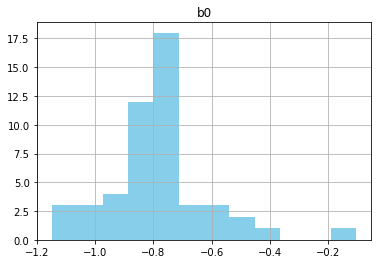

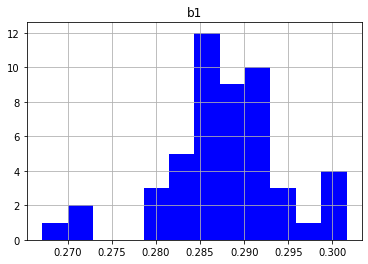

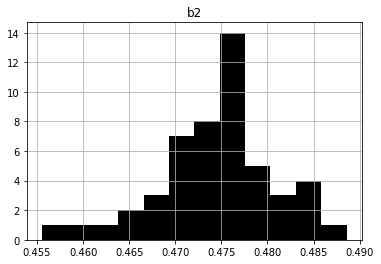

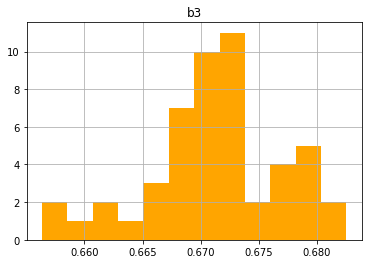

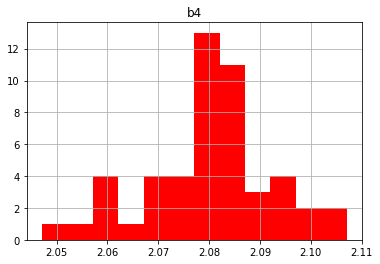

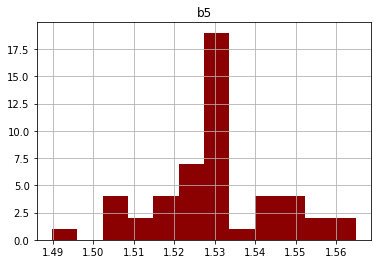

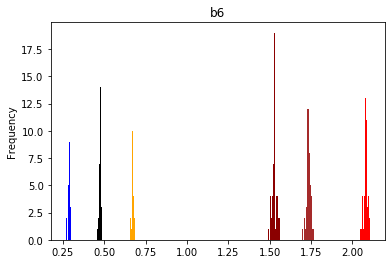

In [6]:
Datos.plotDistribution()

<div class="alert alert-info">
<b>Pruebe el método "getParameters"</b>: <br>
</div>

In [7]:
Datos.getParameters(True)

Su elección fue: Si guardar el DataFrame generado


<div class="alert alert-info">
<b>Muestre cada uno de los atribujos del objeto utilizado en el ejemplo</b>: <br>
</div>

In [8]:
Datos.data

array([[1.00000000e+00, 1.60000000e+01, 1.00000000e+00, 3.00000000e+00,
        5.71817495e+00, 5.74296768e+00, 3.62430396e+00, 3.48212567e+01],
       [1.00000000e+00, 5.00000000e+00, 1.90000000e+01, 0.00000000e+00,
        7.21603202e+00, 3.05135780e+00, 9.01730965e+00, 4.48058921e+01],
       [1.00000000e+00, 1.10000000e+01, 3.00000000e+00, 5.00000000e+00,
        5.35482202e+00, 5.25215933e-01, 8.02328755e+00, 3.10873586e+01],
       [1.00000000e+00, 1.90000000e+01, 1.80000000e+01, 0.00000000e+00,
        1.50374100e+00, 3.07021641e+00, 9.53886385e+00, 3.79931544e+01],
       [1.00000000e+00, 1.90000000e+01, 1.30000000e+01, 0.00000000e+00,
        2.81754392e+00, 3.08919454e+00, 4.85237186e-01, 2.14124204e+01],
       [1.00000000e+00, 3.00000000e+00, 0.00000000e+00, 1.10000000e+01,
        6.93762736e+00, 8.65858590e+00, 8.20375946e+00, 4.73197688e+01],
       [1.00000000e+00, 1.30000000e+01, 1.90000000e+01, 3.00000000e+00,
        1.52413420e+00, 6.58181466e-01, 4.70675807e+00, 2.

In [9]:
Datos.itera

50

In [10]:
Datos.X

array([[1.00000000e+00, 1.60000000e+01, 1.00000000e+00, 3.00000000e+00,
        5.71817495e+00, 5.74296768e+00, 3.62430396e+00],
       [1.00000000e+00, 5.00000000e+00, 1.90000000e+01, 0.00000000e+00,
        7.21603202e+00, 3.05135780e+00, 9.01730965e+00],
       [1.00000000e+00, 1.10000000e+01, 3.00000000e+00, 5.00000000e+00,
        5.35482202e+00, 5.25215933e-01, 8.02328755e+00],
       [1.00000000e+00, 1.90000000e+01, 1.80000000e+01, 0.00000000e+00,
        1.50374100e+00, 3.07021641e+00, 9.53886385e+00],
       [1.00000000e+00, 1.90000000e+01, 1.30000000e+01, 0.00000000e+00,
        2.81754392e+00, 3.08919454e+00, 4.85237186e-01],
       [1.00000000e+00, 3.00000000e+00, 0.00000000e+00, 1.10000000e+01,
        6.93762736e+00, 8.65858590e+00, 8.20375946e+00],
       [1.00000000e+00, 1.30000000e+01, 1.90000000e+01, 3.00000000e+00,
        1.52413420e+00, 6.58181466e-01, 4.70675807e+00],
       [1.00000000e+00, 1.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.66361272e+00, 3

In [11]:
Datos.Y

array([[34.82125672],
       [44.80589205],
       [31.08735857],
       [37.99315444],
       [21.41242039],
       [47.3197688 ],
       [26.7119935 ],
       [32.95108779],
       [47.69022077],
       [35.34568792],
       [45.11883709],
       [40.07752994],
       [22.12878336],
       [37.33331689],
       [40.72323415],
       [43.22083647],
       [29.71760437],
       [39.79408285],
       [45.29352448],
       [14.33655517],
       [33.4533468 ],
       [44.46526101],
       [18.44277459],
       [30.5968086 ],
       [41.19098272],
       [34.20199091],
       [30.63295535],
       [29.99844424],
       [45.96918599],
       [28.75448255],
       [38.9279507 ],
       [32.10801135],
       [13.39371941],
       [39.63161144],
       [57.12383568],
       [45.04025704],
       [30.47677385],
       [17.44466137],
       [44.69783568],
       [42.23580397],
       [21.57174446],
       [39.13058875],
       [36.78494408],
       [42.99411474],
       [48.99101108],
       [23